In [1]:
# project: p11
# submitter: NETID1
# partner: NETID2
# hours: ????


In [74]:
#import cell
# add code to import the os module
import os
# add code to import the csv module
import csv
# add code to import the json module
import json
# add code to import the pandas module
import pandas
# add code to import the matplotlib module
import matplotlib
# add code to import nametuple type *from* collections
from collections import namedtuple
from datetime import datetime as dt #this is for a time_delta only
from questions import view_plot_data, verify_bar, verify_scatter
import copy

from questions import view_plot_data, verify_bar, verify_scatter

In [3]:
#Required followup cell
%matplotlib inline

In [4]:
#required functions, in different cells because during lab 11 we realized some weren't working 100%, oops! easier
#to spot fix if they are in different cells
#read_json
def read_json(path):
    with open(path, encoding='utf-8') as f:
        return json.load(f)

In [5]:
#get_mapping
def get_mapping(pathname):
    """
    Given a path called pathname, load the json data at the path and return the loaded json data.
    If a json.JSONDecodeError is thrown, an empty dictionary is returned.
    """
    try:
        #possibly faulty coade
        return read_json(pathname)
    except (json.JSONDecodeError) as e:
        # make empty dictionary
        empty_dict = {}
        return empty_dict

In [6]:
#comment json
#in P10 we put this inside the get_comment_data, but now its not!
from collections import namedtuple
Comment = namedtuple("Comment", ["video_id", "comment_length","author_id","likes","published_at"])

In [7]:
#get comment data
def get_comment_data(comment_file):
    csv_data = process_csv(comment_file)
    header = csv_data[0]
    # TODO: if required, use a print function call to display header or alternatively, take a look at the comments csv file
    #print(header)
    comment_rows = csv_data[1:]
    
    # TODO: Get the indices for the other columns
    comment_id_idx = header.index("comment_id")
    video_id_idx = header.index("video_id")
    comment_length_idx = header.index("comment_length")
    author_id_idx = header.index("author_id")
    likes_idx = header.index("likes")
    published_at_idx = header.index("published_at")
    
    #print(video_id_idx)
    
    comment_dict = dict()
    
    dud_rows = {}
    
    
    # TODO: Iterate over comment_rows
    for i in comment_rows:
        try:
            comment_id = i[comment_id_idx]
            video_id = i[video_id_idx]
            comment_length = int(i[comment_length_idx])
            author_id = i[author_id_idx]
            likes = int(i[likes_idx])
            published_at = i[published_at_idx]
            #print("success!")
            
        except:
            dud_rows[comment_id] = {}
            #print(comment_id)
            continue
            
        c = Comment(video_id, comment_length, author_id, likes, published_at)    
        comment_dict[comment_id] = c
        #print(type(comment_length))

    return comment_dict
        

In [8]:
#bucketize func

def bucketize(attribute, videos):

    videos_by_attribute_dict = {}
    
    for video_id in videos:
        target_video = videos[video_id]
        target_attribute = target_video[attribute]
        
        if type(target_attribute) == list:
            for idx in range(len(target_attribute)):
                lookup_attribute = target_attribute[idx]
                if lookup_attribute not in videos_by_attribute_dict:
                    videos_by_attribute_dict[lookup_attribute] = list()
                    videos_by_attribute_dict[lookup_attribute].append(video_id)
                else:
                    videos_by_attribute_dict[lookup_attribute].append(video_id)
                    
        else:
            if target_attribute not in videos_by_attribute_dict:
                videos_by_attribute_dict[target_attribute] = list()
                videos_by_attribute_dict[target_attribute].append(video_id)
            else:
                videos_by_attribute_dict[target_attribute].append(video_id)
                
    return videos_by_attribute_dict

In [9]:
#plot dict, for plotting dictionaries!
def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

In [10]:
#our lord and savior process csv
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")  
    exampleReader = csv.reader(exampleFile) 
    exampleData = list(exampleReader)        
    exampleFile.close()  
    return exampleData

In [11]:
#list files in
def list_files_in(pathname):
    """
    Given a (relative) path called pathname, return a list of files at this path. 
    Make sure to exclude files that start with a "." from your list, 
    and that your list of files is sorted alphabetically before you return it.
    """
    data_files = sorted(os.listdir(pathname))
    sieved_data = list()
    for data in data_files:
        if data [0] != ".":
             sieved_data.append(data)
            
    return sieved_data

In [12]:
def list_paths_in(pathname):
    """
    Gets a list of files in pathname directory and generates relative paths to all the files,
    using os.path.join function.
    Returns a list of relative paths to each file inside pathname directory.
    """
    data_list = list_files_in(pathname)
    pathname_list = list()
    
    for data in data_list:
        pathname_list.append(os.path.join(pathname, data))
        
    return pathname_list

In [13]:
#all_paths variable 
all_paths = list_paths_in("data")
#print(all_paths)

In [57]:
#comment_paths

comment_paths = list()
for i in range(len(all_paths)):
    if "comment_data" in all_paths[i]:
        comment_paths.append(all_paths[i])
        
print(comment_paths)

['data/comment_data1.csv', 'data/comment_data2.csv', 'data/comment_data3.csv', 'data/comment_data4.csv', 'data/comment_data5.csv']


In [58]:
#channel_paths
channel_paths = list()
for i in range(len(all_paths)):
    if "channel_ids" in all_paths[i]:
        channel_paths.append(all_paths[i])
        
#print(channel_paths)

In [16]:
#channel dict - different than channel_path! matches up channel ids to channel names
channel_dict = {}

for path in channel_paths:
    channel_mapping = get_mapping(path)
    for channel in channel_mapping:
        channel_dict[channel] = channel_mapping[channel]
        
#print(channel_dict)

In [64]:
#comments dictionary - don't reinitialize!

comments_dict = {}

for comment in comments:
    target_tuple = (comments[comment])
    video_id = target_tuple.video_id
    if video_id not in comments_dict:
        comments_dict[video_id] = list()
        comments_dict[video_id].append(comment)
    else:
        comments_dict[video_id].append(comment)
        
# too big, can't be printed. You can print small parts tho!

In [80]:
#chunky get videos function
def get_videos(data_file, video_mapping_file):
    """
    Given data_file (csv file) and video_mapping_file (json) file, generates a video
    dictionary, mapping video ID to a dictionary containing title, and other details of the video.
    Handles missing entry in video_ids.json by using try / except blocks to handle KeyError.
    """
    data = process_csv(data_file)
    header = data[0]
    #print(header)
    all_videos = data[1:]
    video_mapping = get_mapping(video_mapping_file)
    videos_dict = dict()
    
    video_id_idx = header.index("video_id")
    channel_id_idx = header.index("channel_id")
    published_at_idx = header.index("published_at")
    duration_idx = header.index("duration")
    category_idx = header.index("category")
    tags_idx = header.index("tags")
    views_idx = header.index("views")
    likes_idx = header.index("likes")
    dislikes_idx = header.index ("dislikes")
    
    #print(channel_dict)
    
    for video in all_videos:
        #print(video)
        try:
            video_id = video[video_id_idx]
            title = video_mapping[video_id]
            channel_id = video[channel_id_idx]
            channel_name = channel_dict[channel_id]
            published_at = video[published_at_idx]
            duration = video[duration_idx]
            category = video[category_idx]
            tags = video[tags_idx]
            views = int(video[views_idx])
            likes = int(video[likes_idx])
            dislikes = int(video[dislikes_idx])
            
            comments = comments_dict[video_id]
            
            if video_id not in videos_dict:
                videos_dict[video_id] = {}
                videos_dict[video_id]["title"] = title
                videos_dict[video_id]["channel_name"] = channel_name
                videos_dict[video_id]["published_at"] = published_at
                videos_dict[video_id]["duration"] = duration
                videos_dict[video_id]["category"] = category
                videos_dict[video_id]["tags"] = tags
                videos_dict[video_id]["views"] = views
                videos_dict[video_id]["likes"] = likes
                videos_dict[video_id]["dislikes"] = dislikes
                videos_dict[video_id]["comments"] = comments


                
                
            
        except Exception as e:
            continue
            
#    
    return videos_dict

In [ ]:
#Plot dict function, plug in dictionary and label
def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

In [131]:
def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pandas.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, ylim=0)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16)

In [83]:
#videos
videos = get_videos(os.path.join('data','video_data.csv'), os.path.join('data','video_ids.json'))


dict_keys(['ex98DxvUiAc', '8y9QnS_tMkY', 'IwTkLFYYBKc', '2_9LOiY9Lpc', 'bUrxLCWy-us', '65yHrAJhHMk', 'VAnS_67h1Fw', 'wgZes7y6Bh8', '3iEHVVgCTPI', 'PxsGaHMQTC4', '4P8fKd0IVOs', 'g9pyKmmF3VM', 'p_i-ferkaoM', 'tu-w3QDw46w', 'lwRkRFnbMTQ', 'WrX1aGHK1lM', 'q-1HikE4b54', 'C8RAVJV6Je4', 'vKTl6DczK9k', 'itWFfuFFoSI', 'g7yKe_W_nRY', '707Rhr-QD3Y', 'vWT6YhSs76c', 'iGVpcKidejI', 'V3Ql2DthLJ8', 'DjRwSlVmEbc', '97Z3qSSbwkY', 'BDsaIzfB_qc', 'zk7_fyQDc5s', 'jJie6c5vJJs', 'iTSn_mCgQ0c', 'iyM0rkoO-XI', 'oCBF03d4u0o', 'mraaayzfg9w', '3tWbx5YhGF0', '1ERTKpn9qI8', 'hePyHdb6CMk', '1jrZrVGQoZ0', 'KSUWDJXPk6o', 'kpNjkd4rVXM', 'tzU2P1JfEJM', 'WTyBK0w90T0', '0MGmz9zxBG8', 'sJ6SQBWCPcQ', 'tUeIM8iTx3Q', '9KapEXWynrA', 'RrwQG38ovYw', 'dPnSpIKbgfg', 'L5jBHzsLiwQ', 'MhaZFNjaIw8', '1yLK-yfM3sc', 'OrcIAKgimfk', 'wHJBH4uwNfA', 'H9yhnMIpRS8', '6K_oo-AeNWQ', '8ghEl_ibLiI', 'uzEPvj46rGQ', 'XFZxbKmUCp0', 'qNUTz6dk4HE', 'asasI0kxZrU', 'Sd7E_EQxy_g', 'afCRuGS5zJo', 'emcfCsiIdE0', '-u5Dzq83YOI', 'xXTK7Atcgio', 'nv6kbR-0tMQ',

In [69]:
#bucketizeing things
comment_buckets = bucketize("comments", videos)

In [70]:
#flatten function
def flatten(some_list):
    # Initialize an empty list into a variable called collection
    collection = list()
    
    # Iterate over every item inside some_list
    for i in range(len(some_list)):
        if type(some_list[i]) == list:
            flattened = (flatten(some_list[i]))
            collection.extend(flattened)
            
        else:
            collection.append(some_list[i])
        
    return collection

In [72]:
# process duration - copied from p11 notes
def process_duration(duration_str):

    duration = int(duration_str[0:2]) * 3600 + int(duration_str[3:5]) * 60 + int(duration_str[6:8])
    value = (duration // 300) * 5

    return value

In [95]:
duration_mod_videos = copy.deepcopy(videos)
for video_id in duration_mod_videos:
    unmod_duration = (duration_mod_videos[video_id]["duration"])
    mod_duration = process_duration(unmod_duration)
    duration_mod_videos[video_id]["duration"] = mod_duration
    
duration_buckets = bucketize("duration", duration_mod_videos)


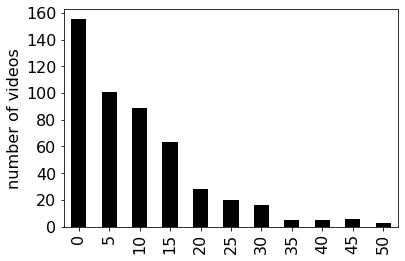

In [98]:
#Q1: Plot the distribution of video durations as a histogram
duration_numeral_dict = dict()
for duration in duration_buckets:
    duration_numeral_dict[duration] = len(duration_buckets[duration])
    
plot_dict(duration_numeral_dict, "number of videos")

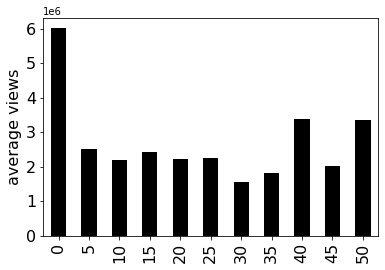

In [113]:
#Q2: Plot the correlation between duration of video (x-axis) and average views (y-axis) as a histogram.
duration_vs_views = dict()
for duration in duration_buckets:
    views_total = 0
    if duration not in duration_vs_views:
        duration_vs_views[duration] = 0
    for video_id in duration_buckets[duration]:
        views_total += (videos[video_id]["views"])
    duration_vs_views[duration] = (views_total/(len(duration_buckets[duration])))
    
plot_dict(duration_vs_views, "average views")

In [114]:
#Q2.1 Verify your plot using verify_bar
verify_bar(duration_vs_views, 2)

For key 10: expected float value 2218656.022222 but found 2187056.382022


False

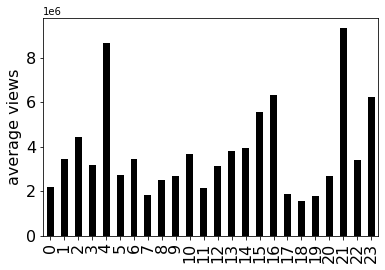

In [126]:
#Q3: Plot the correlation between the hour at which the video is published (x-axis) and the average number of views (y-axis) across all videos in that hour as a histogram.
date_mod_videos = copy.deepcopy(videos)

for video_id in date_mod_videos:
    published_at = date_mod_videos[video_id]["published_at"]
    utc_hour = int(published_at[11:13])
    cdt_hour = (utc_hour-5)%24
    date_mod_videos[video_id]["published_at"] = cdt_hour

mod_date_buckets = bucketize("published_at",date_mod_videos)

published_vs_views = dict()

for hour in mod_date_buckets:
    views_total = 0
    for video_id in mod_date_buckets[hour]:
        views_total += videos[video_id]["views"]
        
    published_vs_views[hour] = views_total/(len(mod_date_buckets[hour]))

plot_dict(published_vs_views, "average views")
        


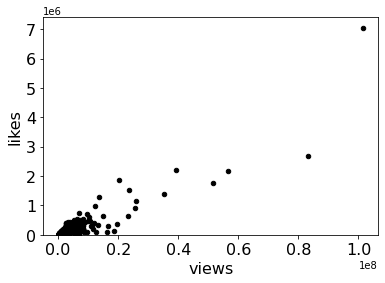

In [142]:
#Q4: Plot the correlation between the views (x-axis) and likes (y-axis) on a video.

views_vs_likes = dict()

for video_id in videos:
    views = (videos[video_id]["views"])
    likes = videos[video_id]["likes"]
    views_vs_likes[views] = likes

scatter(views_vs_likes.keys(), views_vs_likes.values(), "views", "likes")

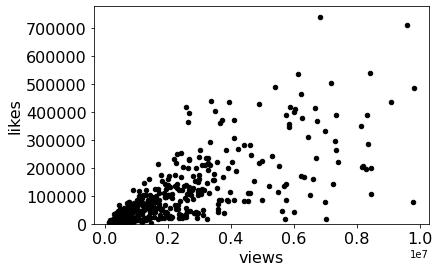

In [153]:
#Q5: Plot the correlation between the views (x-axis) and likes (y-axis) on a video with the outliers removed
views_vs_likes_trimmed = dict()
threshold = 10**7

for views in views_vs_likes:
    if views <= threshold:
        views_vs_likes_trimmed[views] = views_vs_likes[views]
        
scatter(views_vs_likes_trimmed.keys(), views_vs_likes_trimmed.values(), "views", "likes")

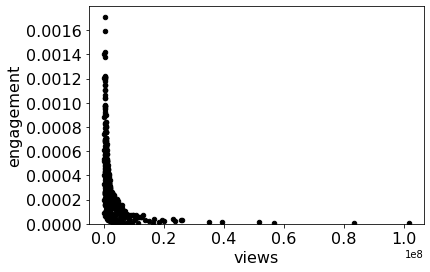

In [158]:
#Q6: Plot the correlation between the views (x-axis) and audience engagement (y-axis) on a video.
#engagement = comments/views

views_vs_engagement = dict()

for video in videos:
    total_comments = len(videos[video]["comments"])
    views = videos[video]["views"]
    engagement = total_comments/views
    views_vs_engagement[views] = engagement

scatter(views_vs_engagement.keys(), views_vs_engagement.values(), "views", "engagement")

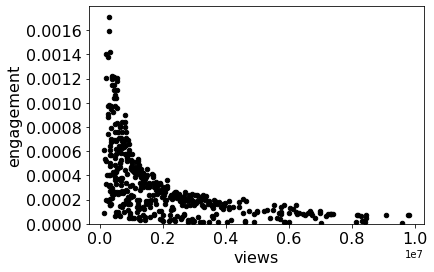

In [160]:
#Q7: Plot the correlation between the views (x-axis) and audience engagement (y-axis) on a video with the outliers removed.

views_vs_engagement_trimmed = dict()
for views in views_vs_engagement:
    if views <= 1e7:
        views_vs_engagement_trimmed[views] = views_vs_engagement[views]
    
scatter(views_vs_engagement_trimmed.keys(), views_vs_engagement_trimmed.values(), "views", "engagement")


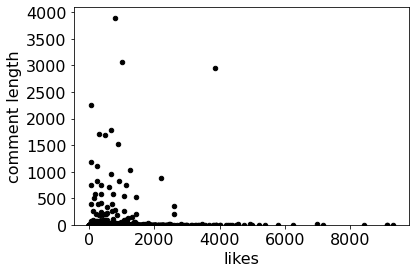

In [173]:
#Q8: Plot the correlation between the length of a comment text (x-axis) and the number of likes on the comment (y-axis).

#Something is wrong here, not enirely sure whats up with the values. The core code is mostly correct tho
length_vs_likes = dict()

for comment in comments:
    target_tuple = comments[comment]
    likes = (target_tuple.likes)
    length = target_tuple.comment_length
    length_vs_likes[length] = likes
    
scatter(length_vs_likes.keys(), length_vs_likes.values(), "likes", "comment length")
    





In [195]:
#Q9: Plot the correlation between the length of a comment text (x-axis) and the number of likes on the comment (y-axis) with the outliers removed

d




In [208]:
def sort_comments_by_published_time(video_title):
    # TODO: Loop through videos to find the video_id with this title
    
    for video in videos:
        if videos[video]["title"] == video_title:
            comment_id_pub_dict = dict()
            comment_id_list = (videos[video]["comments"])
            for comment_id in comment_id_list:
                target_tuple = (comments[comment_id])
                published_at = target_tuple.published_at
                comment_id_pub_dict[comment_id] = published_at
                
    comment_id_pub_dict_sort = dict(sorted(comment_id_pub_dict.items(), key = lambda item: item[1]))
    comments_list = list()
    for i in comment_id_pub_dict_sort.keys():
        comments_list.append(i)
    
    return(comments_list)           
                
    



In [214]:
#Q10: What is the length of the first comment under the video "If I lose a boss fight, the video ends 2 (Genshin Impact)"?

target_comments = sort_comments_by_published_time("If I lose a boss fight, the video ends 2 (Genshin Impact)")
first_comment = comments[target_comments[0]]
first_comment.comment_length



66

In [219]:
#Q11: What is the average number of likes for the first 5 comments under the video 'Facebook, Instagram and WhatsApp down in global outage'?

target_comments = sort_comments_by_published_time('Facebook, Instagram and WhatsApp down in global outage')
total_likes = 0
average_likes = 0
for comment in target_comments[0:6]:
    total_likes += comments[comment].likes

total_likes/len(target_comments[0:6])

410.5

In [ ]:
def time_delta(start, end):
    '''takes in start and end times in "yyyy-mm-dd hh:mm:ss" format and returns the number of days (as a float) between the two times '''
    start_dt = dt.strptime(start,'%Y-%m-%d %H:%M:%S')
    end_dt = dt.strptime(end, '%Y-%m-%d %H:%M:%S')
    return (end_dt-start_dt).total_seconds()/86400